In [2]:
import sys
sys.path.pop(0)

'/Library/Python/2.7/site-packages'

In [5]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score
#from sklearn.cross_validation import cross_val_score
import sklearn.metrics
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [6]:
df = pd.read_csv('data/train_Titan.csv')

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.shape

(891, 12)

In [9]:
df.drop(['Name','Cabin','Ticket', 'PassengerId'],axis=1, inplace=True)

In [10]:
df_new = df.dropna(how='any')

In [11]:
df_new.shape

(712, 8)

In [12]:
df_new['Sex'] = df_new['Sex'].map({'male':1, 'female':0})

/Users/ziru/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
#df_new.Embarked.unique()
df_new = pd.concat([df_new, pd.get_dummies(df_new['Embarked'])], axis=1)

In [14]:
df_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,0,3,1,22.0,1,0,7.2500,S,0,0,1
1,1,1,0,38.0,1,0,71.2833,C,1,0,0
2,1,3,0,26.0,0,0,7.9250,S,0,0,1
3,1,1,0,35.0,1,0,53.1000,S,0,0,1
4,0,3,1,35.0,0,0,8.0500,S,0,0,1


In [15]:
df_new.drop('Embarked', axis=1, inplace=True)

In [16]:
X = df_new[df_new.drop('Survived', axis =1).columns]
y = df_new['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
#feature_names = X_train.columns
y_pred = clf.predict(X_test)

(-1, 10)

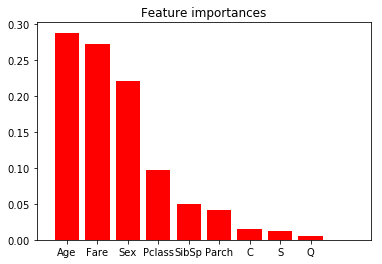

In [19]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = list(X_train.columns[indices])
plt.title("Feature importances")
plt.bar(range(9), importances[indices], color="r", align="center")
plt.xticks(range(9), feature_names)
plt.xlim([-1, 10])

In [20]:
X = df_new[df_new.drop('Survived', axis =1).columns]
y = df_new['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [17]:
clf = LogisticRegression()
#clf.fit(X_train, y_train)
#y_pred = clf.predict(X_test)
cross_val_score(clf, X, y, cv = 11, scoring = 'roc_auc').mean()

0.849484105388289

In [18]:
clf = RandomForestClassifier()
cross_val_score(clf, X, y, cv = 11, scoring = 'roc_auc').mean()

0.83944697153199177

In [41]:
random_forest_grid = {'max_depth': [5, None],
                      'max_features': ['sqrt', 'log2', None],
                      'min_samples_split': [2, 4],
                      'min_samples_leaf': [1, 2, 4],
                      'bootstrap': [True, False],
                      'n_estimators': [100],
                      'random_state': [1]}
rf_gridsearch = GridSearchCV(RandomForestClassifier(),
                             random_forest_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='roc_auc')
rf_gridsearch.fit(X_train, y_train)

print "best parameters:", rf_gridsearch.best_params_

best_rf_model = rf_gridsearch.best_estimator_

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   24.0s finished


best parameters: {'bootstrap': True, 'min_samples_leaf': 4, 'n_estimators': 100, 'min_samples_split': 2, 'random_state': 1, 'max_features': 'sqrt', 'max_depth': 5}


In [30]:
cross_val_score(best_rf_model, X, y, cv = 11, scoring = 'roc_auc').mean()

0.86945089323631841

In [22]:
gradient_boosting_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
                          'loss': ['deviance', 'exponential'],
                          'max_depth': [1, 2, 4, 6],
                          'min_samples_leaf': [1, 2, 5, 10],
                          'max_features': [1.0, 0.3, 0.1],
                          'n_estimators': [100],
                          'random_state': [1]}
gbclf_gridsearch = GridSearchCV(GradientBoostingClassifier(), 
                              gradient_boosting_grid,
                              n_jobs=-1,
                              scoring='roc_auc')
gbclf_gridsearch.fit(X_train, y_train)
print ("best parameters:", gbclf_gridsearch.best_params_)

best_gbclf_model = gbclf_gridsearch.best_estimator_
cross_val_score(best_gbclf_model, X, y, cv = 11, scoring = 'roc_auc').mean()

KeyboardInterrupt: 

In [32]:
cross_val_score(best_rf_model, X, y, cv = 11, scoring = 'accuracy').mean()

0.8091577929646111

In [33]:
cross_val_score(best_gbclf_model, X, y, cv = 11, scoring = 'accuracy').mean()

0.80922136575545667

In [44]:
trees = [300,500]
for t in trees:
    clf = RandomForestClassifier(n_estimators=t, bootstrap=True, max_depth=5, n_jobs=-1)
    print '# of trees:{}, mean accuracy:'.format(t),cross_val_score(clf, X, y, cv = 5, scoring = 'accuracy').mean()

# of trees:300, mean accuracy: 0.802095107969
# of trees:500, mean accuracy: 0.799268077842


In [59]:
trees = [300,500]
for t in trees:
    clf = GradientBoostingClassifier(n_estimators=t,min_samples_leaf=10,learning_rate=0.02 ,max_depth=4)
    print '# of trees:{}, mean accuracy:'.format(t),cross_val_score(clf, X, y, cv = 5, scoring = 'accuracy').mean()

# of trees:300, mean accuracy: 0.817518980869
# of trees:500, mean accuracy: 0.82031604396


In [31]:
from imblearn.over_sampling import RandomOverSampler

In [32]:
ros = RandomOverSampler()

In [45]:
sum(y==0)

424

In [46]:
sum(y==1)

288

In [38]:
X_resampled, y_resampled = ros.fit_sample(X, y)

In [39]:
sum(y_resampled==1)

424

In [40]:
sum(y_resampled==0)

424

In [43]:
type(X_resampled)#[y_resampled==0]

numpy.ndarray